In [2]:
%matplotlib inline

import numpy as np

from collections       import defaultdict, Counter
from matplotlib        import pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.ticker import NullFormatter

In [5]:
def data_generate(data_en,data_fr,len_en,len_fr):
    data = []
    with open(data_en, 'r') as text_en, open(data_fr, 'r') as text_fr:
        for (line_en, line_fr) in zip(text_en, text_fr):
            data.append([len_en(line_en), len_fr(line_fr)])
    return np.array(data)

In [22]:
def plot_len_and_cor(name_en,name_fr,data,unit_name):
    x, y = zip(*data)

    # define our basic units of length
    left     , width  = 0.1, 0.65
    bottom   , height = 0.1, 0.65
    bottom_h = left_h = left + width + 0.02

    # start with a rectangular figure
    plt.figure(1, figsize=(8, 8))

    main = plt.axes([left  , bottom  , width, height])
    hist_en = plt.axes([left  , bottom_h, width, 0.2   ])
    hist_fr = plt.axes([left_h, bottom  , 0.2  , height])

    # no labels
    nullfmt = NullFormatter()
    hist_en.xaxis.set_major_formatter(nullfmt)
    hist_en.yaxis.set_major_formatter(nullfmt)
    hist_fr.xaxis.set_major_formatter(nullfmt)
    hist_fr.yaxis.set_major_formatter(nullfmt)

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax    = np.max([np.max(np.fabs(x)), np.max(np.fabs(y))])
    lim      = (int(xymax/binwidth) + 1) * binwidth
    bins     = np.arange(0, lim + binwidth, binwidth)

    # plot the scatter plot
    main.scatter(x,y)
    main.set_xlim((0, lim))
    main.set_ylim((0, lim))
    main.set_xlabel('%s sentence length (%s)' % (name_en,unit_name))
    main.set_ylabel('%s sentence length (%s)' % (name_fr,unit_name))

    # plot the histograms
    hist_en.hist(sorted(x), normed=True, bins=bins)
    hist_fr.hist(sorted(y), normed=True, bins=bins, orientation='horizontal')
    hist_en.set_xlim(main.get_xlim())
    hist_fr.set_ylim(main.get_ylim())
    hist_en.set_ylabel('Counts')
    hist_fr.set_xlabel('Counts')

    # plot the correlation
    k = sum(x*y for x,y in data) / sum(x ** 2 for x,_ in data)
    print("Factor between %s and %s sentence length is %0.2f" % (name_en,name_fr,k))
    main.plot([0,lim], [0,k*lim], color='red')

    plt.show()

Factor between English and Inuktitut sentence length is 0.42


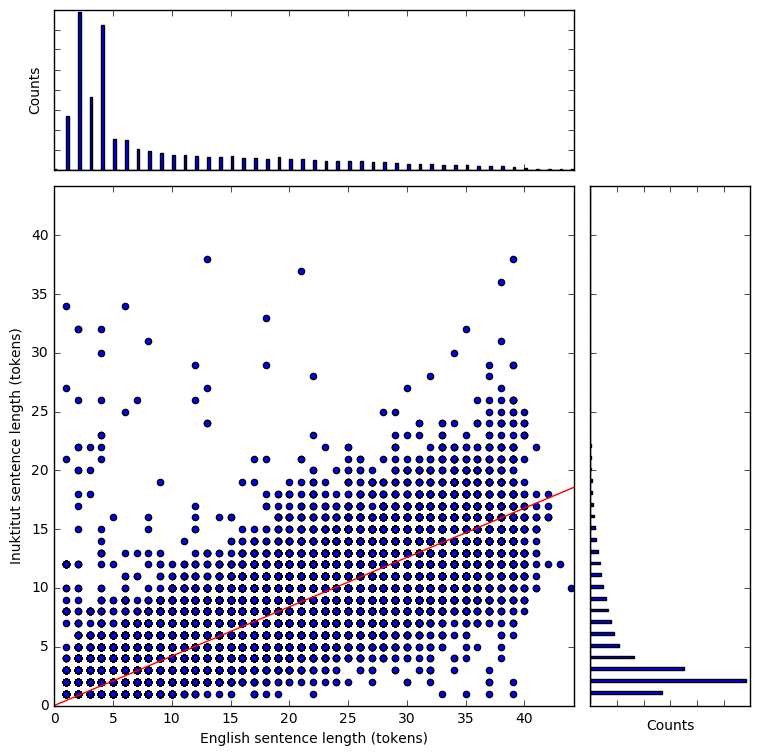

In [23]:
len_tok = lambda sent: len(sent.split(' '))
data = data_generate(data_en='in_en_data_50000/text.en',
                     data_fr='in_en_data_50000/text.fr',
                     len_en=len_tok,
                     len_fr=len_tok)
plot_len_and_cor(name_en='English',
                 name_fr='Inuktitut',
                 data=data,
                 unit_name='tokens')

Factor between English and Inuktitut sentence length is 1.06


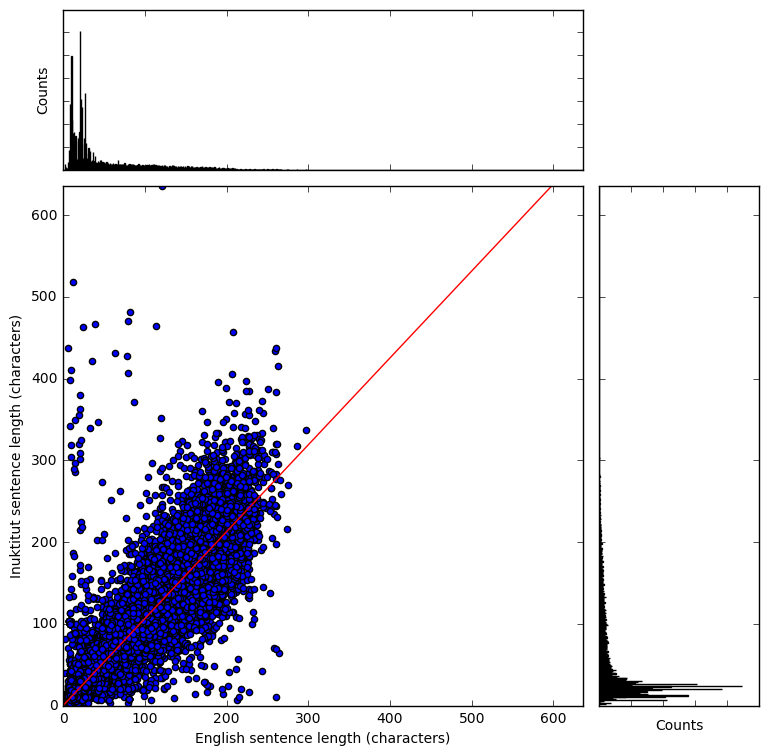

In [24]:
len_char = lambda sent: len(sent)
data = data_generate(data_en='in_en_data_50000/text.en',
                     data_fr='in_en_data_50000/text.fr',
                     len_en=len_char,
                     len_fr=len_char)
plot_len_and_cor(name_en='English',
                 name_fr='Inuktitut',
                 data=data,
                 unit_name='characters')

Factor between English and Inuktitut sentence length is 0.46


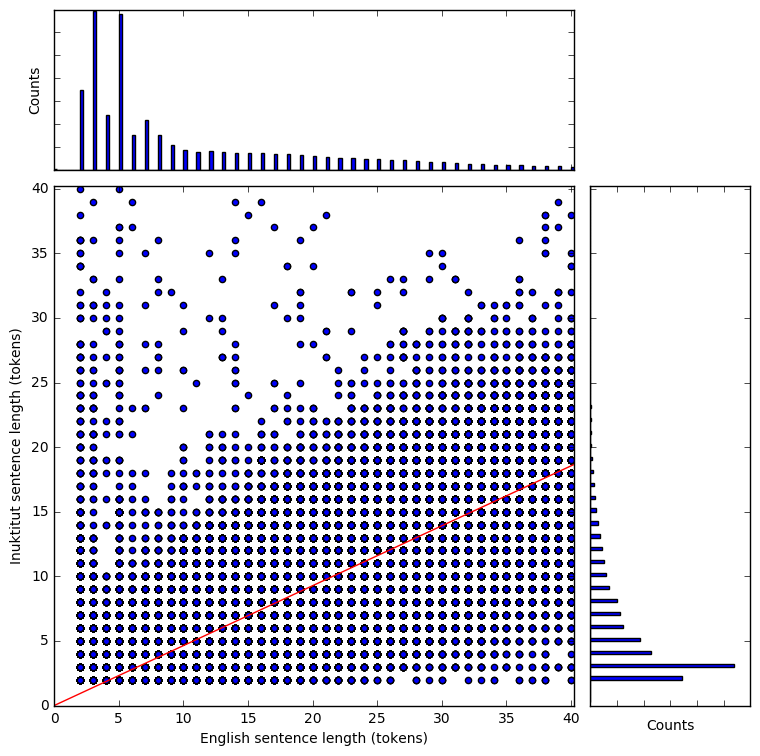

In [ ]:
len_tok = lambda sent: len(sent.split(' '))
data = data_generate(data_en='in_en_data/text_all.en',
                     data_fr='in_en_data/text_all.fr',
                     len_en=len_tok,
                     len_fr=len_tok)
plot_len_and_cor(name_en='English',
                 name_fr='Inuktitut',
                 data=data,
                 unit_name='tokens')

In [ ]:
len_char = lambda sent: len(sent)
data = data_generate(data_en='in_en_data/text_all.en',
                     data_fr='in_en_data/text_all.fr',
                     len_en=len_char,
                     len_fr=len_char)
plot_len_and_cor(name_en='English',
                 name_fr='Inuktitut',
                 data=data,
                 unit_name='characters')